In [84]:
import tensorflow as tf
import random
import collections
from collections import Counter
import numpy as np

In [85]:
def display_random_images_with_labels(d, n=10):
    """
        accept dataset in tuple form, first index
        is np arrays (images) and second is labels
        and display n random images with labels
        from it
        Inputs:
            d (tuple): dataset images, dataset labels on same indexs
            n (int): number of samples to display (default: 10)
        Output:
            None
    """
    choices = list(range(len(d[0])))
    for i in range(n):
        index = random.choice(choices)
        choices.remove(index)
        print("index:",index)
        print("Lable:",d[1][index])
        plt.imshow(d[0][index], cmap='gray')
        plt.show()

In [86]:
dataset = tf.keras.datasets.mnist.load_data()

#**Description of dataset**

*   Mnist is handwritten digits (0 to 9) images dataset loads those images in gray scale as cv2 images / np arrays with those labels dataset is in tuple form
*   Its first index dataset[0] represents training dataset

*   Its second index dataset[1] represents testing dataset
*   Both training (dataset[0]) and testing (dataset[1]) datasets are further tuples and have two elements, first element of both training and testing (dataset[0][0] and dataset[0][0])





There are 60000 images in training dataset
There are 10000 images in testing dataset
___________________
(28, 28)
___________________
Randomly printing 10 images with labels from training dataset
index: 57156
Lable: 5


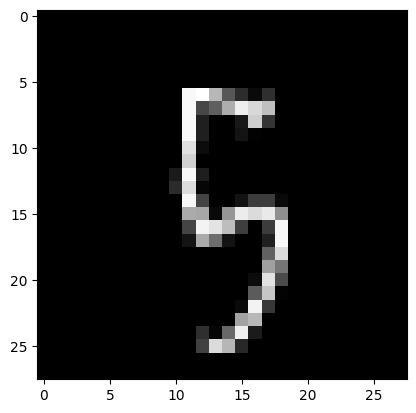

index: 22646
Lable: 0


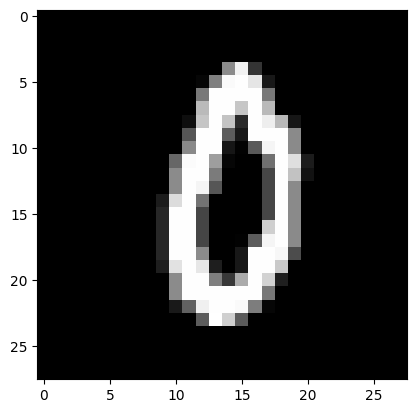

index: 21641
Lable: 7


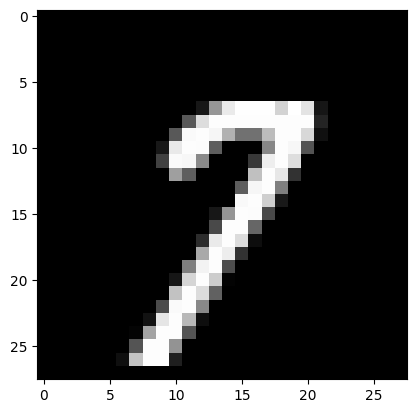

index: 13073
Lable: 4


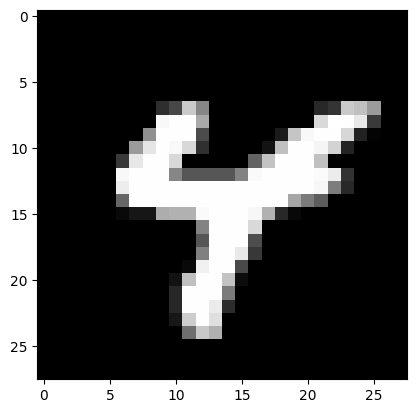

index: 40812
Lable: 2


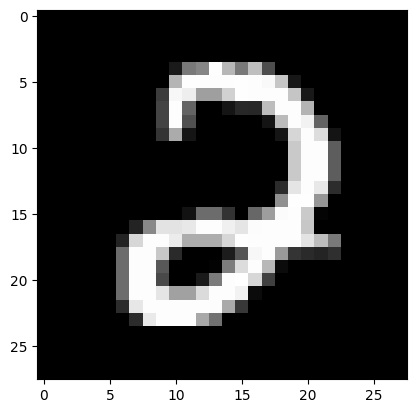

index: 34595
Lable: 1


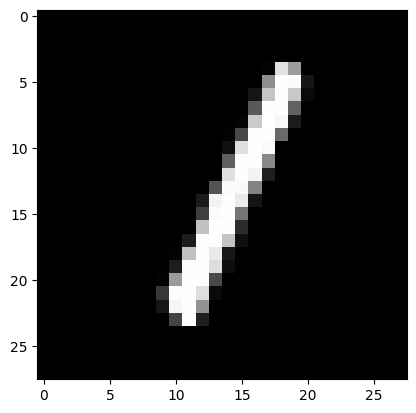

index: 12096
Lable: 9


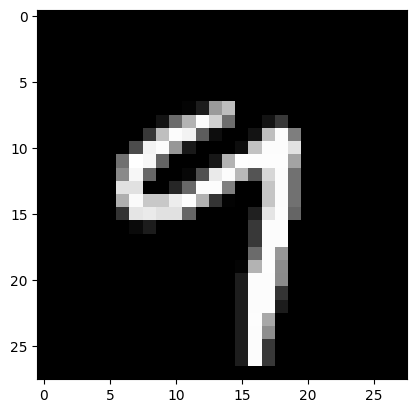

index: 53725
Lable: 7


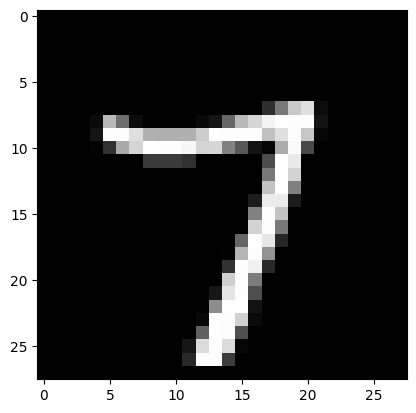

index: 53324
Lable: 9


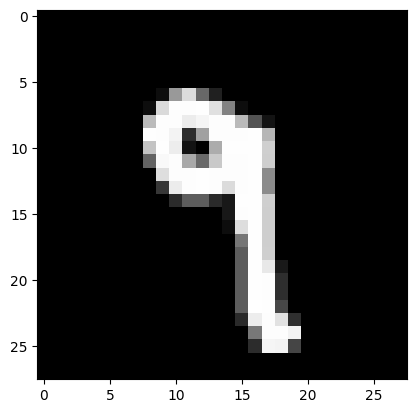

index: 43267
Lable: 1


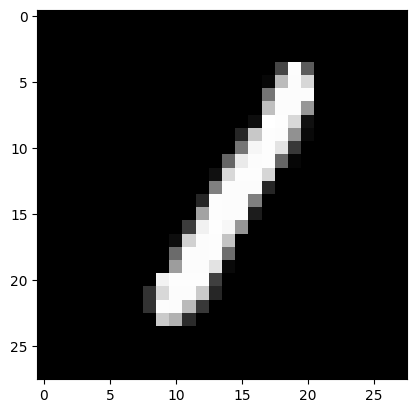

___________________
Randomly printing 10 images with labels from testing dataset
index: 43380
Lable: 3


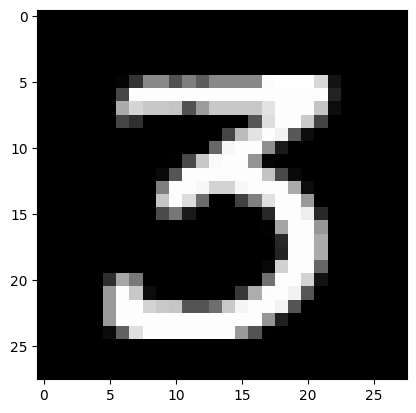

index: 58618
Lable: 1


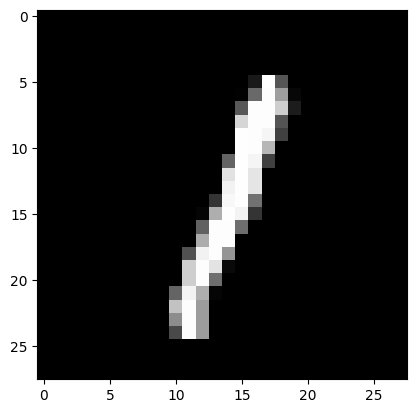

index: 41058
Lable: 9


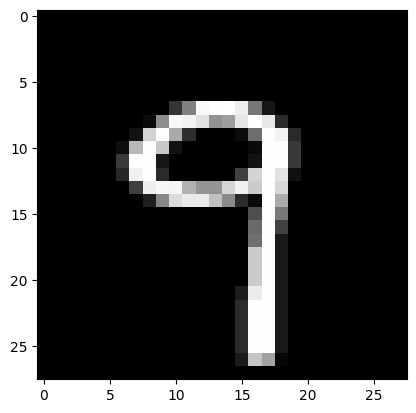

index: 37612
Lable: 7


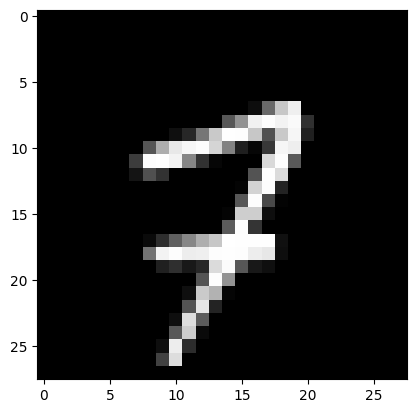

index: 22583
Lable: 0


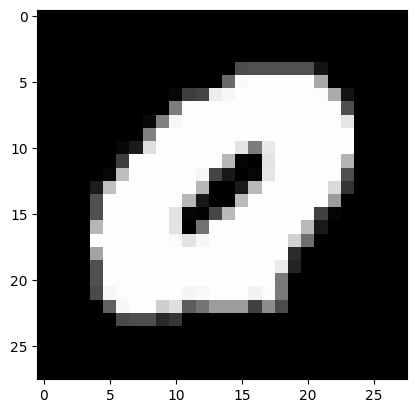

index: 36599
Lable: 5


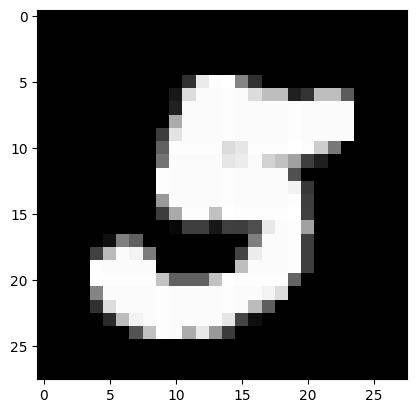

index: 19815
Lable: 2


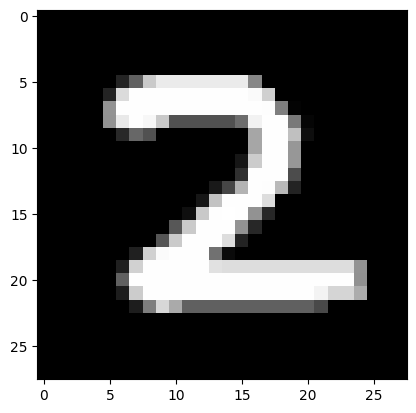

index: 12754
Lable: 7


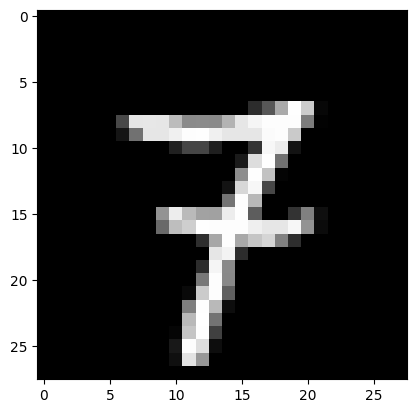

index: 57317
Lable: 1


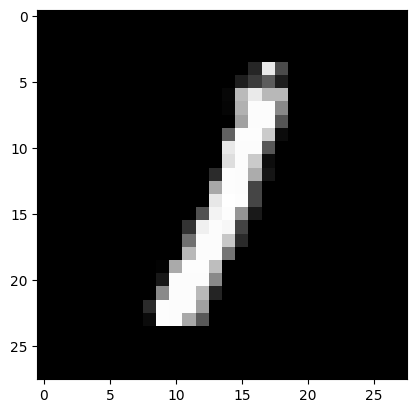

index: 41366
Lable: 2


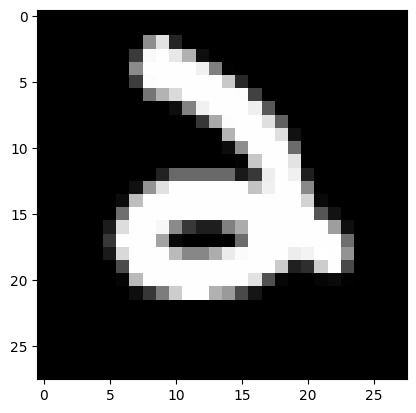

___________________
There are 60000 labels in training dataset for 60000 images in training dataset
There are 10000 labels in training dataset for 10000 images in training dataset
___________________
There are 10 unique classes in training dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({5: 5421,
         0: 5923,
         4: 5842,
         1: 6742,
         9: 5949,
         2: 5958,
         3: 6131,
         6: 5918,
         7: 6265,
         8: 5851})

There are 10 unique classes in validation dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({7: 1028,
         2: 1032,
         1: 1135,
         0: 980,
         4: 982,
         9: 1009,
         5: 892,
         6: 958,
         3: 1010,
         8: 974})

__________


In [87]:
print("There are",len(dataset[0][0]),"images in training dataset")
print("There are",len(dataset[1][0]),"images in testing dataset")
print("___________________")

#Each image is of shape 28x28
print(dataset[0][0][0].shape)
print("___________________")

# Second element of both training and testing (dataset[0][1] and dataset[0][1]) represnts labels of the images, presents on the same index in images
# For example dataset[0][0][0] is an image in training dataset and dataset[0][1][0] is the label of same image is training dataset
print("Randomly printing 10 images with labels from training dataset")
display_random_images_with_labels(dataset[0])
print("___________________")
print("Randomly printing 10 images with labels from testing dataset")
display_random_images_with_labels(dataset[0])
print("___________________")
print("There are",len(dataset[0][1]),"labels in training dataset for",len(dataset[0][0]),"images in training dataset")
print("There are",len(dataset[1][1]),"labels in training dataset for",len(dataset[1][0]),"images in training dataset")
print("___________________")
print("There are", len(set(dataset[0][1])),"unique classes in training dataset")
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")
display(collections.Counter(dataset[0][1]))
print("There are", len(set(dataset[1][1])),"unique classes in validation dataset")
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")
display(collections.Counter(dataset[1][1]))
print("___________________")


#**Task**


*   You have to reduce the size of this dataset by 10 times.
*   There are currently almost 5000 to 6000 thousand images (total: 60000) for each label in training and almost 1000 images (total: 10000) for each label in testing dataset.

*   You are required to reduce this training dataset so that it will have exactly 600 images for each label (total: 6000) in training dataset and exactly 100 images for each label in testing dataset (total: 1000)
*   new dataset should be stored into new_dataset variable name and should have exactly same format as the original datas








**My code here**

In [88]:
train_images, train_labels = dataset[0]
test_images, test_labels = dataset[1]

In [89]:
def dataset(images, labels, num_samples):
    reduced_images = []
    reduced_labels = []
    unique_labels = np.unique(labels)

    for label in unique_labels:
        label_indices = np.where(labels == label)[0]
        selected_indices = np.random.choice(label_indices, num_samples, replace=False)
        reduced_images.extend(images[selected_indices])
        reduced_labels.extend(labels[selected_indices])

    return np.array(reduced_images), np.array(reduced_labels)

# Reduce the training dataset to 600 images per label
new_label_train = 600
new_train_images, new_train_labels = dataset(train_images, train_labels, new_label_train)

# Reduce the testing dataset to 100 images per label
new_label_test = 100
new_test_images, new_test_labels =  dataset(test_images, test_labels, new_label_test)

# Create the new reduced dataset
new_dataset = ((new_train_images, new_train_labels), (new_test_images, new_test_labels))

**Checking the shape of first image in new training dataset**

(28, 28)
___________________
There are 6000 labels in training dataset for 6000 images in training dataset
There are 1000 labels in testing dataset for 1000 images in testing dataset
___________________
There are 10 unique classes in training dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({0: 600,
         1: 600,
         2: 600,
         3: 600,
         4: 600,
         5: 600,
         6: 600,
         7: 600,
         8: 600,
         9: 600})

There are 10 unique classes in validation dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({0: 100,
         1: 100,
         2: 100,
         3: 100,
         4: 100,
         5: 100,
         6: 100,
         7: 100,
         8: 100,
         9: 100})

___________________
Randomly printing 10 images with labels from training dataset
index: 2285
Lable: 3


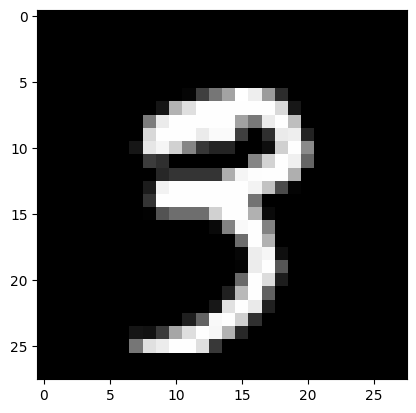

index: 3410
Lable: 5


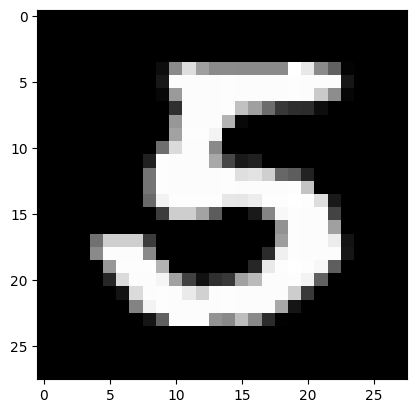

index: 5574
Lable: 9


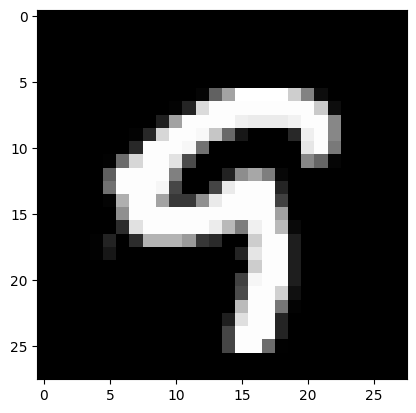

index: 2986
Lable: 4


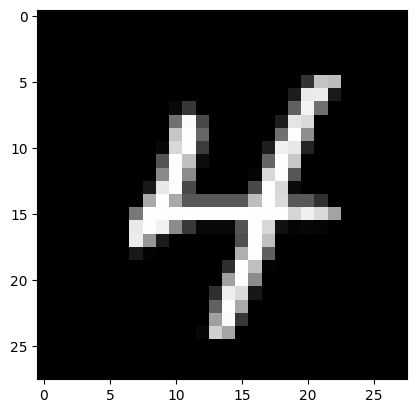

index: 4345
Lable: 7


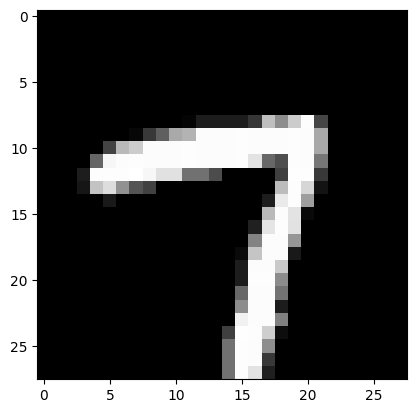

index: 5270
Lable: 8


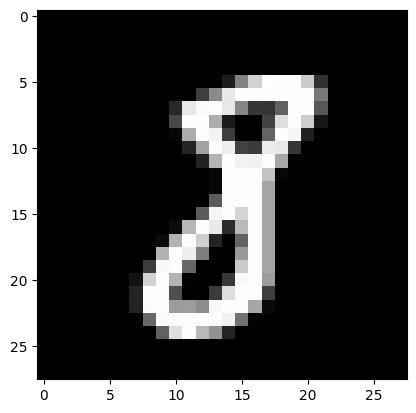

index: 4323
Lable: 7


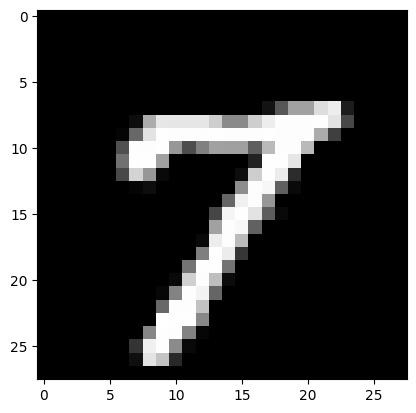

index: 3771
Lable: 6


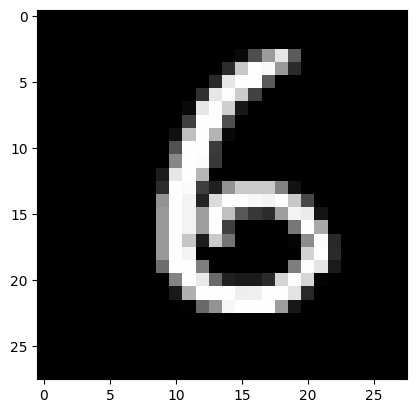

index: 4513
Lable: 7


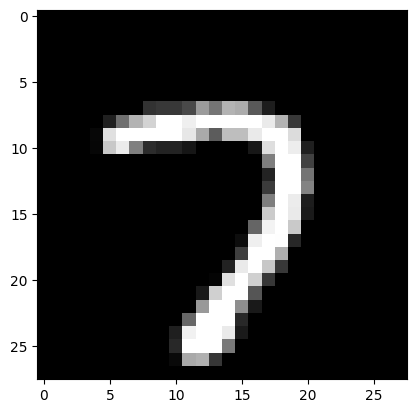

index: 895
Lable: 1


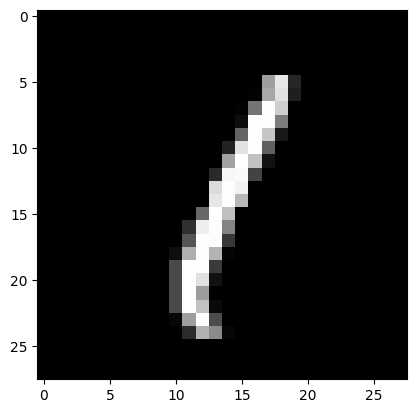

___________________
Randomly printing 10 images with labels from testing dataset
index: 2459
Lable: 4


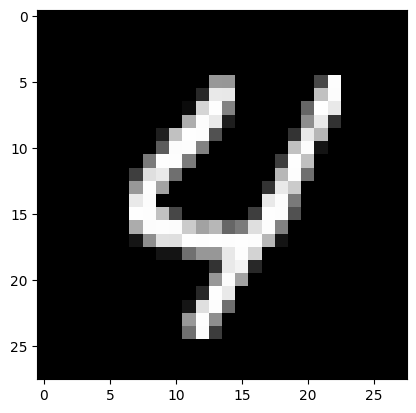

index: 1919
Lable: 3


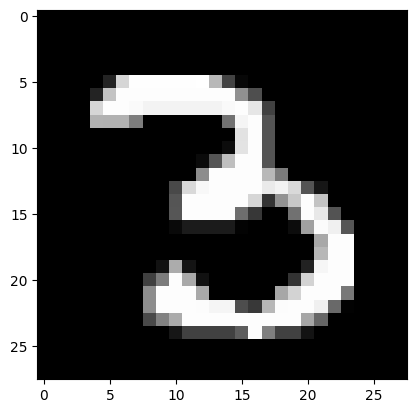

index: 1171
Lable: 1


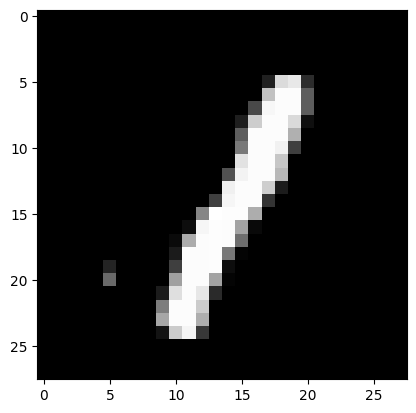

index: 5545
Lable: 9


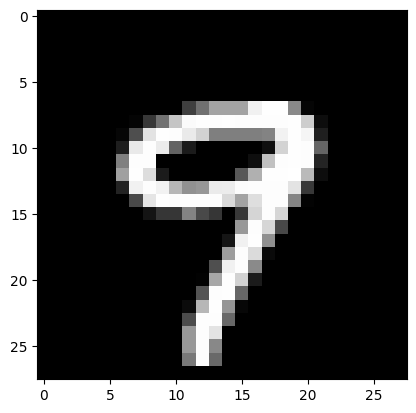

index: 516
Lable: 0


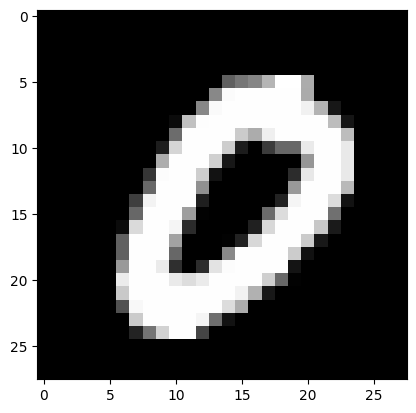

index: 5082
Lable: 8


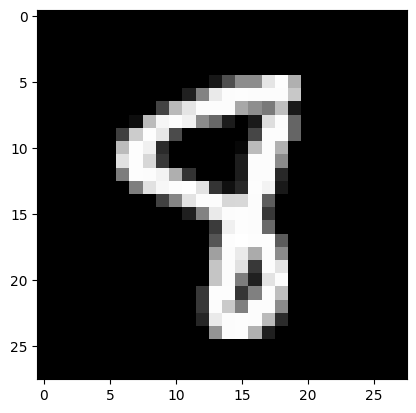

index: 4954
Lable: 8


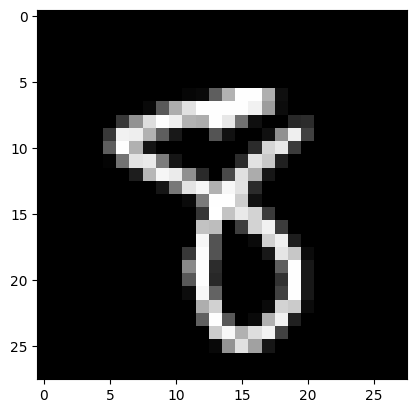

index: 2774
Lable: 4


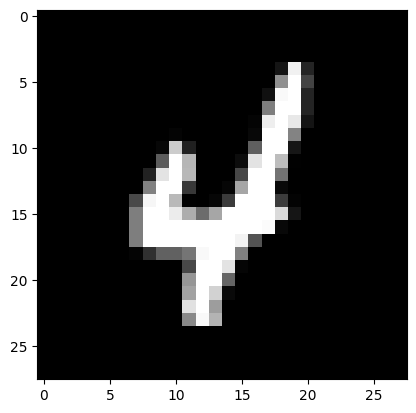

index: 5410
Lable: 9


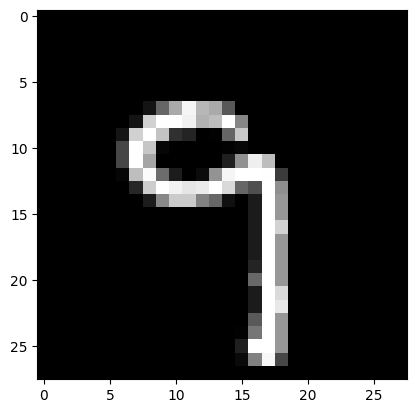

index: 5431
Lable: 9


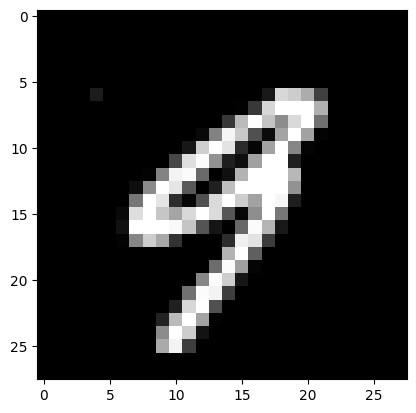

_____________


In [90]:
print(new_dataset[0][0][0].shape)
print("___________________")

#Checking the size of dataset

print("There are",len(new_dataset[0][1]),"labels in training dataset for",len(new_dataset[0][0]),"images in training dataset")
print("There are",len(new_dataset[1][1]),"labels in testing dataset for",len(new_dataset[1][0]),"images in testing dataset")
print("___________________")

#Excepted output
#There are 6000 labels in training dataset for 6000 images in training dataset
#There are 1000 labels in training dataset for 1000 images in training dataset
#Checking the number of images per class

print("There are", len(set(new_dataset[0][1])),"unique classes in training dataset")
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")
display(collections.Counter(new_dataset[0][1]))
print("There are", len(set(new_dataset[1][1])),"unique classes in validation dataset")
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")
display(collections.Counter(new_dataset[1][1]))
print("___________________")

#Expected output
#There are 10 unique classes in training dataset
#Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)
Counter({0: 600, 1: 600, 2: 600, 3: 600, 4: 600, 5: 600, 6: 600, 7: 600, 8: 600, 9: 600})

#There are 10 unique classes in validation dataset
#Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)
Counter({0: 100, 1: 100, 2: 100, 3: 100, 4: 100, 5: 100, 6: 100, 7: 100, 8: 100, 9: 100})

#Checking the correctness of indexing of image and its labels
print("Randomly printing 10 images with labels from training dataset")
display_random_images_with_labels(new_dataset[0])
print("___________________")
print("Randomly printing 10 images with labels from testing dataset")
display_random_images_with_labels(new_dataset[0])
print("___________________")